# Loan Approval Predicition Model:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import random

#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


In [3]:
## Editing our column names for ease in use.
columns = []
for i in df.columns.values:
    m = str(i)
    columns.append(m.replace('.' , '_'))
    
df.columns = columns

In [4]:
## Lets see our dataset...
df.isnull().sum()

Loan_ID                             0
Current_Loan_Amount                 0
Term                                0
Credit_Score                    12229
Years_in_current_job             2529
Home_Ownership                      0
Annual_Income                   12229
Purpose                             0
Monthly_Debt                        0
Years_of_Credit_History             0
Months_since_last_delinquent    32475
Number_of_Open_Accounts             0
Number_of_Credit_Problems           0
Current_Credit_Balance              0
Maximum_Open_Credit                 0
Bankruptcies                      127
Tax_Liens                           2
Loan_Status                         0
dtype: int64

In [5]:
df.shape

(60804, 18)

In [6]:
from collections import Counter
print('Original dataset shape :' , Counter(df['Loan_Status']))

Original dataset shape : Counter({1: 46178, 0: 14626})


#### Here we can see the dataset is not balanced.

# Explorartory Data Analysis:


## Loan Term :

Term
Long Term     67.340554
Short Term    79.182510
Name: Loan_Status, dtype: float64

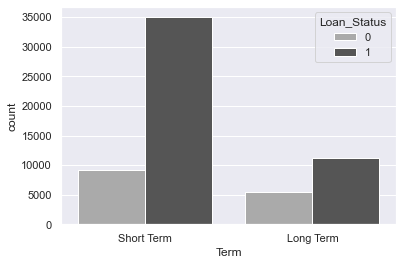

In [7]:
sns.countplot(x = 'Term' , hue = 'Loan_Status' , data = df , palette = 'gist_gray_r')
df.groupby(['Term']).Loan_Status.mean()*100

### "Term" is divided into two categories:
1. Short Term
2. Long Term

      - We can see that 79% of applicant under "Short Term" category got the loan approved
      - also, 69% of applicant under "Long Term" category got the loan approved

## Home Ownership :

In [8]:
## Finding all unique entries.....
df['Home_Ownership'].unique()

array(['Home Mortgage', 'Rent', 'Own Home', 'HaveMortgage'], dtype=object)

### We can see that "Home Mortgage" and "HaveMortgage" both are same....
    - Hence we can simply combine then under one entry.    

In [9]:
## Replacing "HaveMortgage" to "Home Mortgage"....
df['Home_Ownership'].replace('HaveMortgage' , 'Home Mortgage' , inplace = True)

Percentage of Loan Approved under this categories :
                 Loan_Status
Home_Ownership             
Home Mortgage     78.203783
Own Home          76.124003
Rent              73.314683 


No. of individual entries :
                Home_Ownership
Home Mortgage           29551
Rent                    25737
Own Home                 5516


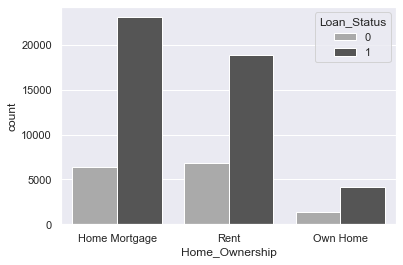

In [10]:
## Plotting a countplot of feature "Home_Ownership" with "Loan_Status"....
sns.countplot(x='Home_Ownership', hue='Loan_Status', data=df, palette='gist_gray_r')

print("Percentage of Loan Approved under this categories :\n" , 
      pd.DataFrame(df.groupby(['Home_Ownership']).Loan_Status.mean()*100) , "\n\n" )
print("No. of individual entries :\n" , pd.DataFrame(df['Home_Ownership'].value_counts()))

### Feature "Home Ownership" is divided into Three categories:
1. Home Mortgage    
2. Own Home        
3. Rent

        - The top 2 most occuring category types are "Home Mortgage" - 29551 and "Rent" - 25737
        - We can see that 78% of applicant with the problem of "Home Mortgage" got the loan approved
        - also, 73% of applicant with the problem of "Rent" got the loan approved

## Years in Current Job :

<AxesSubplot:>

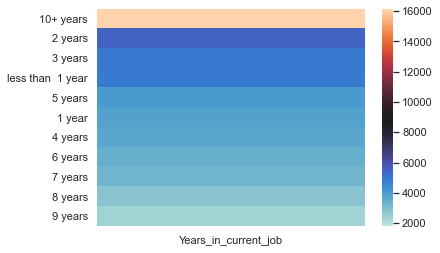

In [11]:
sns.heatmap(pd.DataFrame(df['Years_in_current_job'].value_counts()) , square = False ,cmap = 'icefire' ,robust=True, vmin=1813)

<AxesSubplot:xlabel='count', ylabel='Years_in_current_job'>

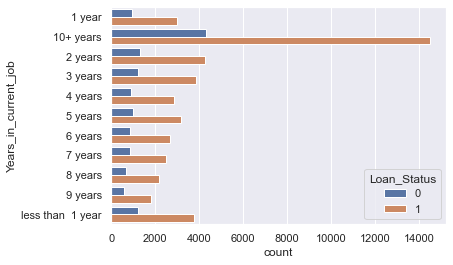

In [12]:
sns.countplot(y = df['Years_in_current_job'].sort_values() , hue = df['Loan_Status'])

### Major Takeaways:
- Majority of people, got their Loan approved have spent 5+ Years in their Current Job. This may pointing towards the bank giving Loan to people having high Job Security.
- "10+ years" is the most occuring category of this feature.
- This feature have 2529 NAN.

## Credit Score:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_Score'>

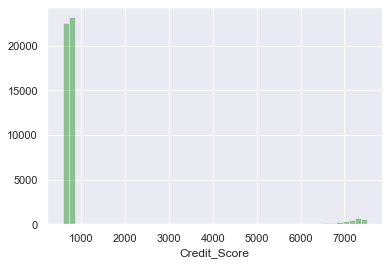

In [13]:
sns.distplot(df['Credit_Score'].dropna() , hist = True , kde = False  , color = 'green')

###### What is Credit Score
A credit score is a measure of an individual’s ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Correct Minimum Entry of Credit Score is:  585.0 
Correct Maximum Entry of Credit Score is:  751.0


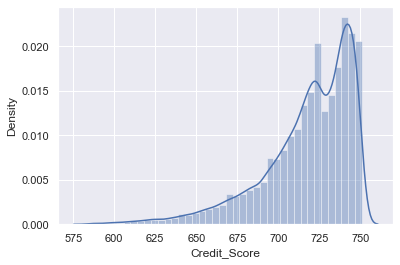

In [14]:
## DistPlot for the correct entries of Credit Score.
sns.distplot(df[df['Credit_Score'] < 999].Credit_Score , kde = True , bins = 40) 
print("Correct Minimum Entry of Credit Score is: ",df[df['Credit_Score'] < 900].Credit_Score.min() , 
      "\nCorrect Maximum Entry of Credit Score is: " ,df[df['Credit_Score'] < 900].Credit_Score.max())

<AxesSubplot:>

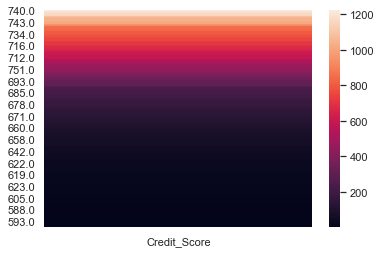

In [15]:
## Since the possible value of Credit Score is 3 Digits Only...
## We need to divide all 4 Digit entries with 10....
temp = df[df['Credit_Score'] > 999].Credit_Score*0.1

## now put them back in the main data frame...
df.loc[temp.index , 'Credit_Score'] = temp

## Different Entries with respect to their Occurence.
sns.heatmap(pd.DataFrame(df['Credit_Score'].value_counts()))

## Annual Income:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

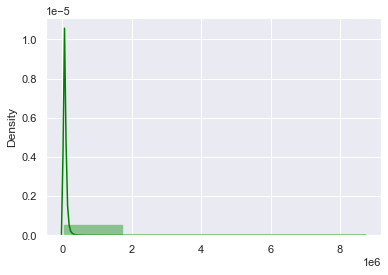

In [16]:
sns.distplot(df.Annual_Income.dropna().unique() , color = 'green' , bins = 5 )

In [17]:
print('No. Values above 80000 :' , df[df['Annual_Income'] > 80000].Annual_Income.dropna().count())
print('No. Values above 125000 :' , df[df['Annual_Income'] > 125000].Annual_Income.dropna().count())
print('No. Values above 250000 :' , df[df['Annual_Income'] > 250000].Annual_Income.dropna().count())
print('No. Values above 500000 :' , df[df['Annual_Income'] > 500000].Annual_Income.dropna().count())
print('No. Values above 1000000 :' , df[df['Annual_Income'] > 1000000].Annual_Income.dropna().count())
print('No. Values above 2000000 :' , df[df['Annual_Income'] > 2000000].Annual_Income.dropna().count() , '\n\n')

## Mean of the feature...
print('Mean of Feature :' , df['Annual_Income'].dropna().mean())

## Minimum and Maximum value records in the feature...
print('Minimum Value Record of the Feature :' , df['Annual_Income'].dropna().min() , 
     '\nMaximum Value Record of the Feature :' , df['Annual_Income'].dropna().max())

No. Values above 80000 : 14808
No. Values above 125000 : 4161
No. Values above 250000 : 425
No. Values above 500000 : 49
No. Values above 1000000 : 7
No. Values above 2000000 : 1 


Mean of Feature : 72522.52891405043
Minimum Value Record of the Feature : 4268.0 
Maximum Value Record of the Feature : 8713547.0


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

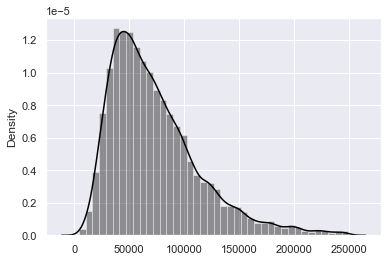

In [18]:
sns.distplot(df[df['Annual_Income'] < 250000].Annual_Income.dropna().unique() , color = 'black' , bins = 40)

##### Few takeaways:
- In this feature we have some number of outliers
- There are around 482 Outliers with the value ranging from '250000' to '9000000',We can drop these outliers. As they count not even 1% of whole dataset Records.
- Now are resultant column will have values ranging from 0 to 250000. 
- This columns still have 12229 NAN values.

## Purpose:

In [19]:
## Checking all different catefories in the given feature...
df['Purpose'].unique()

array(['Debt Consolidation', 'Medical Bills', 'Home Improvements',
       'other', 'Business Loan', 'moving', 'small_business', 'Buy House',
       'Buy a Car', 'Take a Trip', 'Other', 'major_purchase', 'wedding',
       'Educational Expenses', 'vacation', 'renewable_energy'],
      dtype=object)

In [20]:
## Since the category "Other" are "other" are same only...
## Combining the 2 categories...

df['Purpose'].replace('other' , 'Other' , inplace = True)
df['Purpose'].unique()

array(['Debt Consolidation', 'Medical Bills', 'Home Improvements',
       'Other', 'Business Loan', 'moving', 'small_business', 'Buy House',
       'Buy a Car', 'Take a Trip', 'major_purchase', 'wedding',
       'Educational Expenses', 'vacation', 'renewable_energy'],
      dtype=object)

In [21]:
#(df.groupby(['Purpose']).Loan_Status.mean()*100).sort_values(ascending = False)
df.groupby(['Purpose']).Loan_Status.sum().sort_values(ascending = False)\
## sns.countplot( y = df['Purpose']  , hue = 'Loan_Status' , data = df)

Purpose
Debt Consolidation      36298
Other                    4318
Home Improvements        2788
Buy a Car                 630
Business Loan             612
Medical Bills             504
Buy House                 331
Take a Trip               228
major_purchase            162
small_business             96
Educational Expenses       58
moving                     54
wedding                    52
vacation                   46
renewable_energy            1
Name: Loan_Status, dtype: int64

<AxesSubplot:ylabel='Purpose'>

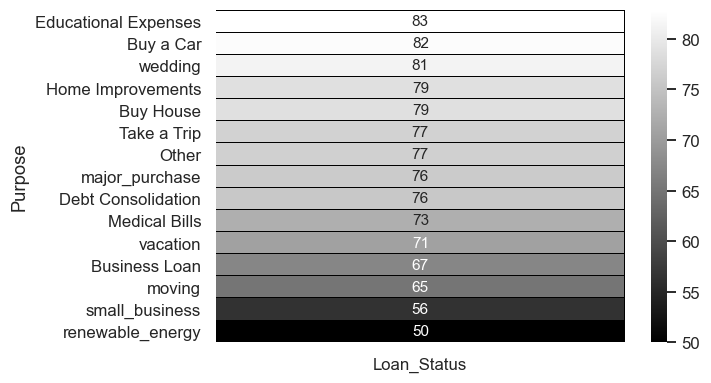

In [22]:
plt.figure(dpi = 110 ,figsize=(6,4))
sns.heatmap(pd.DataFrame((df.groupby(['Purpose']).Loan_Status.mean()*100).sort_values(ascending = False)) , 
            cmap = 'binary_r', annot=True, linewidths=0.01 , linecolor='black', robust=False)

## Labels on each Bar represent the Percentage of Applicant which got loan Approved under the following category of "Purpose" 

<AxesSubplot:xlabel='count', ylabel='Purpose'>

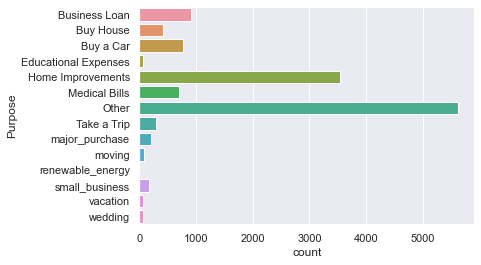

In [23]:
## CountPlot without "Debt Consolidation" Category...
sns.countplot(y = df[df['Purpose'] != 'Debt Consolidation'].Purpose.sort_values()  , data = df)

#### Our Observation:
- The most occured record is "Debt Consolidation", also the major chunk of applicant of this category got their Loans Approved.
- There are many applicants which did'nt told about the purose and selected 'Other' Category

- **Diving deep into the data:**
    - There are some categories which can be combined together like "Business Loan" , "Buy House" , "Medical Bills"(aasuming that if someone has to take Loan for "Medical Bills" then they must be high Capital Involved), "major_purchase" and "small_business" because this kind of Loans are taken for High Capital Investment.
    - While there are some Categories which can also be combined togther like : "Other" , "Take a Trip" , "moving" , "Educational Expenses" , "vacation" , "wedding" , "renewable_energy". All these category are very arbitrary and don't have any serious trend.

## Monthly Debt:
- **Monthly debt payments** are any payments you make to pay back a creditor or lender for money you borrowed.

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly_Debt', ylabel='Density'>

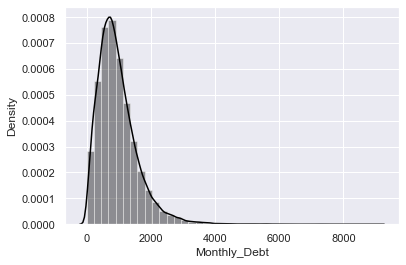

In [24]:
sns.distplot(df['Monthly_Debt'] , color = 'black' , bins = 40)

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'\n\nApplicants with Monthly Debts More than 7000'}, xlabel='Monthly_Debt', ylabel='Density'>

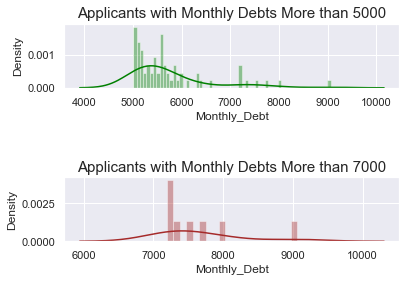

In [25]:
plt.subplot(3,1,1)
plt.title("Applicants with Monthly Debts More than 5000" , fontsize = 15)
sns.distplot(df[df['Monthly_Debt'] > 5000].Monthly_Debt , color = 'green' , bins = 60)
plt.subplot(3,1,3)
plt.title("\n\nApplicants with Monthly Debts More than 7000" , fontsize = 15)
sns.distplot(df[df['Monthly_Debt'] > 7000].Monthly_Debt , color = 'brown' , bins = 20)

#### Our Observation:
- There are only 64 Applicants with Monthly Debt higher than **5000**
- Majority of these Applicants have high "Annual Income" which compliments to fact that **they can pay High Monthly Debts.**
- **Our Majority Applicants have Monthly Debts less than 5000**
- There are only **8** applicants with Monthly Debt Greater than **7000**
- We have 0 NAN in this Feature

## Years of Credit History:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years_of_Credit_History', ylabel='Density'>

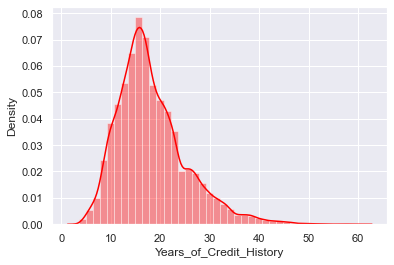

In [26]:
sns.distplot(df['Years_of_Credit_History'] , bins = 40 , kde = True , color = 'red')

- Majority of applicants have records ranging from **1** to **35** Years
- 0 NAN in the feature

##### Note:
- A **credit history** is a record of a borrower's responsible repayment of debts. A **credit report** is a record of the borrower's credit history from a number of sources, including banks, credit card companies, collection agencies, and governments.
- **7 years** is deemed a reasonable amount of time to establish a good credit history. After seven years, most negative items will fall off your credit report. However, the seven-year time period doesn’t guarantee your credit score and credit history will improve.

## Number of Credit Problems:	

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Number_of_Credit_Problems', ylabel='count'>

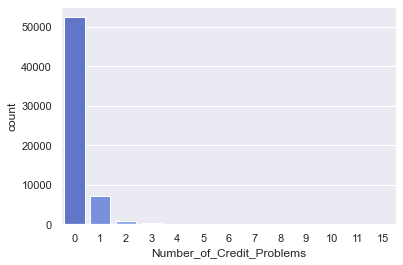

In [27]:
sns.countplot(df['Number_of_Credit_Problems'] , data = df , palette='coolwarm' )

##### Our Observation:
- About **86%** of applicants have **0** Number of Credit Problems 
- Around **11%** have **1** Credit Problems
- Rest **3%** have more than **1** Credit Problems

## Current Credit Balance:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Current_Credit_Balance', ylabel='Density'>

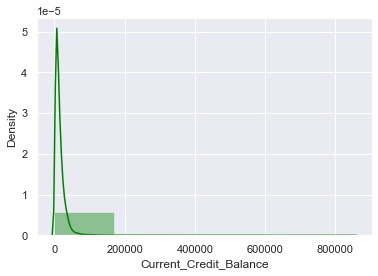

In [28]:
sns.distplot(df['Current_Credit_Balance'] , bins = 5 , color = 'green')

In [29]:
## Counting the No, of records for different range...
print('No. Records above 100000 :' , df[df['Current_Credit_Balance'] > 100000].Current_Credit_Balance.count())
print('No. Records above 150000 :' , df[df['Current_Credit_Balance'] > 150000].Current_Credit_Balance.count())
print('No. Records above 200000 :' , df[df['Current_Credit_Balance'] > 200000].Current_Credit_Balance.count())
print('No. Records above 300000 :' , df[df['Current_Credit_Balance'] > 300000].Current_Credit_Balance.count())
print('No. Records above 400000 :' , df[df['Current_Credit_Balance'] > 400000].Current_Credit_Balance.count())
print('No. Records above 500000 :' , df[df['Current_Credit_Balance'] > 500000].Current_Credit_Balance.count())
print('No. Records above 600000 :' , df[df['Current_Credit_Balance'] > 600000].Current_Credit_Balance.count())
print('No. Records above 700000 :' , df[df['Current_Credit_Balance'] > 700000].Current_Credit_Balance.count() , '\n\n')

## Mean of the feature...
print('Mean of Feature :' , df['Current_Credit_Balance'].mean())

## Finding mean of the Feature for the records ranging from 0 to 50000...
print('Mean of the Feature for the records ranging from 0 to 50000 :' , 
      df[df['Current_Credit_Balance'] > 50000].Current_Credit_Balance.mean())


## Percentage of records between the range of 0 to 50000....
print("\n\nPercentage of total records between the range of 0 to 50000 :" , 
     round((df[df['Current_Credit_Balance'] < 50000].shape[0]/df.shape[0])*100 , 2) , "%")

## Minimum and Maximum value records in the feature...
print('\n\nMinimum Value Record of the Feature :' , df['Current_Credit_Balance'].min() , 
     '\nMaximum Value Record of the Feature :' , df['Current_Credit_Balance'].max())


No. Records above 100000 : 380
No. Records above 150000 : 141
No. Records above 200000 : 87
No. Records above 300000 : 29
No. Records above 400000 : 7
No. Records above 500000 : 5
No. Records above 600000 : 4
No. Records above 700000 : 1 


Mean of Feature : 15430.033862903756
Mean of the Feature for the records ranging from 0 to 50000 : 88171.30404217927


Percentage of total records between the range of 0 to 50000 : 97.19 %


Minimum Value Record of the Feature : 0 
Maximum Value Record of the Feature : 854602


##### Our observation:
- **97.19 %** of total observations lie between the range of 0 to 50000
- Mean of the Feature is greatly affected by the high Magnitude Outliers

## Maximum Open Credit:

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Maximum_Open_Credit', ylabel='Density'>

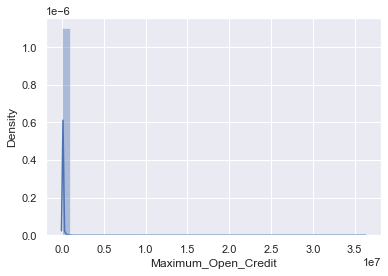

In [30]:
sns.distplot(df['Maximum_Open_Credit'] , bins = 40)

In [31]:
df['Maximum_Open_Credit'].value_counts()

0         406
14724      10
16043       9
14623       9
4833        9
         ... 
307558      1
47463       1
53610       1
59757       1
32672       1
Name: Maximum_Open_Credit, Length: 35349, dtype: int64

In [32]:
df['Maximum_Open_Credit'].unique()

array([40313, 31250,  5669, ..., 51560, 51095,  9724], dtype=int64)

In [33]:
## Counting the No, of records for different range...
print('No. Records above 100000 :' , df[df['Maximum_Open_Credit'] > 100000].Maximum_Open_Credit.count())
print('No. Records above 150000 :' , df[df['Maximum_Open_Credit'] > 150000].Maximum_Open_Credit.count())
print('No. Records above 200000 :' , df[df['Maximum_Open_Credit'] > 200000].Maximum_Open_Credit.count())
print('No. Records above 300000 :' , df[df['Maximum_Open_Credit'] > 300000].Maximum_Open_Credit.count())
print('No. Records above 400000 :' , df[df['Maximum_Open_Credit'] > 400000].Maximum_Open_Credit.count())
print('No. Records above 500000 :' , df[df['Maximum_Open_Credit'] > 500000].Maximum_Open_Credit.count())
print('No. Records above 600000 :' , df[df['Maximum_Open_Credit'] > 600000].Maximum_Open_Credit.count())
print('No. Records above 700000 :' , df[df['Maximum_Open_Credit'] > 700000].Maximum_Open_Credit.count() , '\n\n')

## Mean of the feature...
print('Mean of Feature :' , df['Maximum_Open_Credit'].mean())

## Finding mean of the Feature for the records ranging from 0 to 50000...
print('Mean of the Feature for the records ranging from 0 to 50000 :' , 
      df[df['Maximum_Open_Credit'] > 50000].Maximum_Open_Credit.mean())


## Percentage of records between the range of 0 to 50000....
print("\n\nPercentage of total records between the range of 0 to 50000 :" , 
     round((df[df['Maximum_Open_Credit'] < 50000].shape[0]/df.shape[0])*100 , 2) , "%")

## Minimum and Maximum value records in the feature...
print('\n\nMinimum Value Record of the Feature :' , df['Maximum_Open_Credit'].min() , 
     '\nMaximum Value Record of the Feature :' , df['Maximum_Open_Credit'].max())

No. Records above 100000 : 1542
No. Records above 150000 : 679
No. Records above 200000 : 460
No. Records above 300000 : 248
No. Records above 400000 : 181
No. Records above 500000 : 134
No. Records above 600000 : 99
No. Records above 700000 : 80 


Mean of Feature : 33163.69117163344
Mean of the Feature for the records ranging from 0 to 50000 : 117031.65024440443


Percentage of total records between the range of 0 to 50000 : 87.21 %


Minimum Value Record of the Feature : 0 
Maximum Value Record of the Feature : 36284335


## Months Since Last Delinquent :

  - **Payment delinquency** is commonly used to describe a situation in which a borrower misses their due date for a single scheduled payment.
  - Above feature tells about the numbers of months ago when the applicant had any Payment delinquency.
  - Higher the number of months, better the applicants chances to get Loan.

<AxesSubplot:xlabel='Loan_Status', ylabel='Months_since_last_delinquent'>

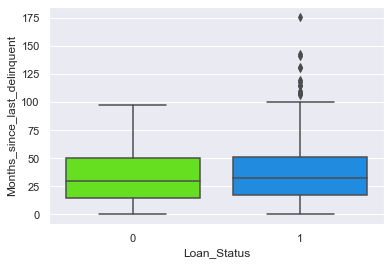

In [34]:
sns.boxplot(y = 'Months_since_last_delinquent' , x = 'Loan_Status', data = df ,   orient='v' , palette="gist_rainbow")

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Months_since_last_delinquent', ylabel='Density'>

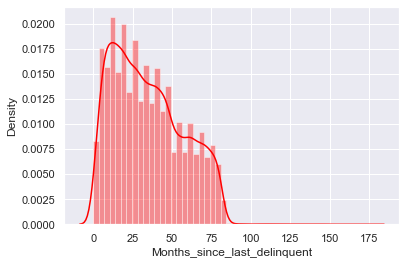

In [35]:
sns.distplot(df['Months_since_last_delinquent'].dropna() , color = 'red' , bins = 50)

In [36]:
print("The Pearson's Correlation Coef is :" , df['Months_since_last_delinquent'].corr(df['Loan_Status']))
print("The Total no. of NANs are :" , df['Months_since_last_delinquent'].isnull().sum())

The Pearson's Correlation Coef is : 0.019541323919613662
The Total no. of NANs are : 32475


- We can see, there is **no serious trend** followed by this particular feature.
- There are many Applicants with **less than 50 months since last delinquent** and they still got the Loan. 
- Here, this particular feature have very minimal impact on deciding the chances of an applicant to get a loan, also the coef. of correlation with "Loan_Status" stands at **0.019** which very less.
- Feature have **32475** NAN Values.

## Number of Open Accounts :

<AxesSubplot:xlabel='Loan_Status', ylabel='Number_of_Open_Accounts'>

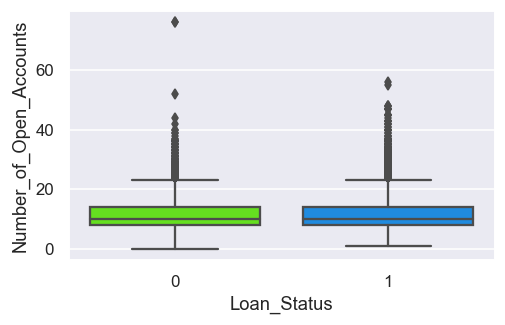

In [37]:
plt.figure(dpi = 110 , figsize = (5,3))
sns.boxplot(y = 'Number_of_Open_Accounts' , x = 'Loan_Status', data = df ,   orient='v' , palette="gist_rainbow")

<AxesSubplot:xlabel='Number_of_Open_Accounts', ylabel='count'>

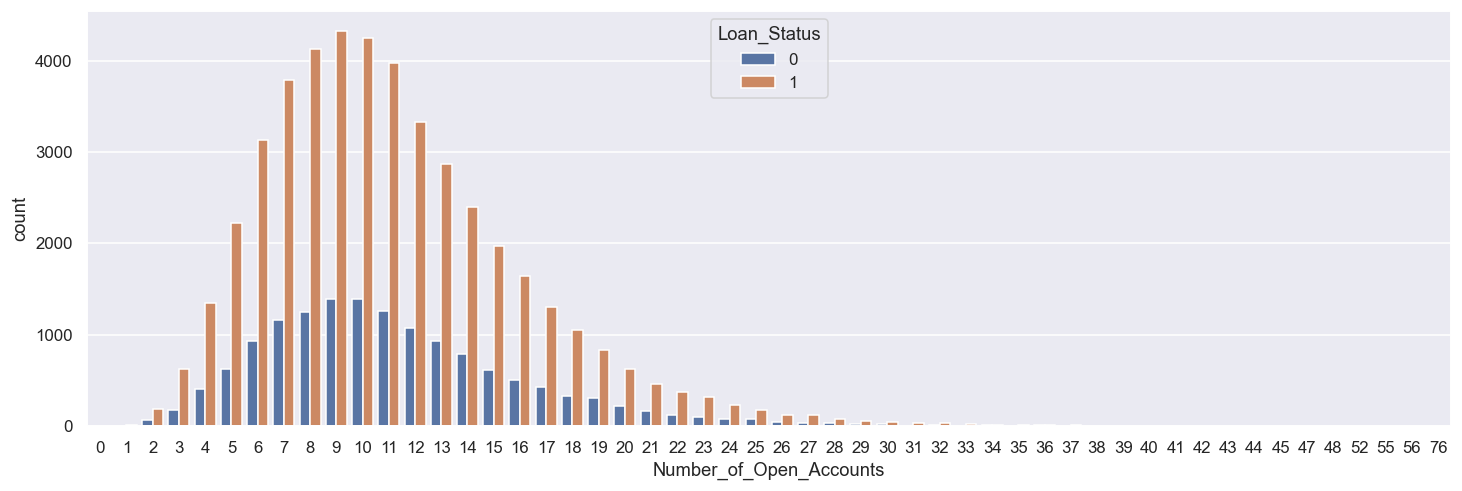

In [38]:
plt.figure(dpi = 110 , figsize = (16,5))
sns.countplot(x = 'Number_of_Open_Accounts' , hue = 'Loan_Status' , data = df)

In [39]:
df['Number_of_Open_Accounts'].corr(df['Loan_Status'])

-0.016107475132568674

- Here we saw that majority of applicants have **4 to 18 Open Accounts**.
- We do have some Outliers. Applicants with more than 30 Open Accounts can be seen plotted as Outliers in the Box Plot.
- The most occured number in this feature is **9**.
- This feature also share a very little correlation with the Target Feature i.e. **"Loan_Status"**.

## Bankruptcies :


<AxesSubplot:xlabel='count', ylabel='Bankruptcies'>

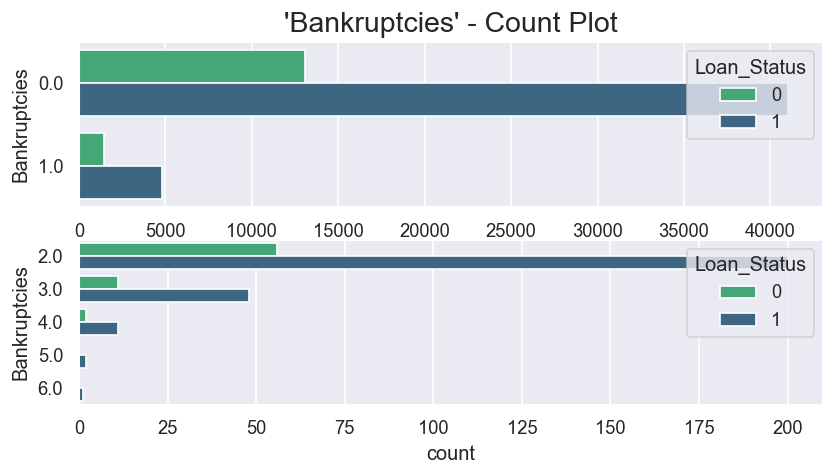

In [40]:
plt.figure(dpi = 120 , figsize = (8,4))
plt.subplot(2,1,1)
plt.title("'Bankruptcies' - Count Plot" , fontsize = 17)
sns.countplot(y = df[df['Bankruptcies'] < 2 ].Bankruptcies , data = df , hue = 'Loan_Status' , palette = 'viridis_r')
plt.subplot(2,1,2)
sns.countplot(y = df[df['Bankruptcies'] > 1 ].Bankruptcies , data = df , hue = 'Loan_Status' , palette = 'viridis_r')

In [41]:
print("Total no. of NAN values are: " , df['Bankruptcies'].isnull().sum())
print("Percentage of applicants with {} Bankruptcy issues are :".format(list(df['Bankruptcies'].value_counts().head(1).index)) 
      , round(list(df['Bankruptcies'].value_counts().head(1))[0]*100/df.shape[0] , 3) , "%")

Total no. of NAN values are:  127
Percentage of applicants with [0.0] Bankruptcy issues are : 88.951 %


- Majority of applicants have **Zero** Bankruptcy issue.
- There are **127** **NANs** that we need to fix. Since "0" is the most occuring Category we can replace the NAN with "0".

## Tax Liens :
- A **Tax Lien** is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for **delinquent taxes** owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.
- More the No. of **Tax Lien** , more the chances of not getting the Loan approved. 

In [42]:
## Finding percentage contribution in the feature...
df['Tax_Liens'].value_counts()*100/df.shape[0]

0.0     98.111966
1.0      1.307480
2.0      0.365108
3.0      0.123347
4.0      0.052628
5.0      0.011512
6.0      0.009868
7.0      0.006579
9.0      0.003289
15.0     0.001645
10.0     0.001645
11.0     0.001645
Name: Tax_Liens, dtype: float64

In [43]:
df['Tax_Liens'].isnull().sum()

2

##### In this feature :
- Majority of applicants around **98%** have **"0" Tax Liens**.
- The feature have only **2 NAN** values. 

## --------------------------------------------------------------------------------------------------------------------------


In [1]:
## Generting a csv file for the above preprocessed data.... 
df.to_csv("data_preprocessed.")

NameError: name 'df' is not defined